# Creates a 1-year hourly electricity demand profile assuming full electrification of building heating in Metro Vancouver in the year 2016    

Building heating includes space heating and water heating in the residential and commercial building sectors.

For details on methods, assumptions, and data sources for space heating, refer to Chapter 5.6 in dissertation "How do we power decarbonization? Land and other resources in Canada’s West" http://hdl.handle.net/1828/11659

Note: daylight savings time and February 29 have been removed from all data sources.

12 August 2021 Kevin Palmer-Wilson kevinpw@uvic.ca

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import datetime
from collections import OrderedDict #OrderedDict() allows us to create a legend wthout duplicate items
from os import getcwd, path

In [3]:
# Configuration:
input_path = path.join(getcwd(),'Input data')
output_path = path.join(getcwd(),'Output data')

#version
#version = 'V23-TRANSPORT'
#version = 'V42-LowHeatDemand'

#Define folder structure for input files
#input_path = path.join(getcwd(),'..','data','demand')

#Define folder structure for output files
#fig_prefix = path.join(getcwd(),'figures','demand')
#tab_prefix = path.join(getcwd(),'tables')
#para_prefix = path.join(getcwd(),'OSeMOSYS_params')
#demand_prefix = path.join(getcwd(),'total_hourly_demands')

#Use perturbed space heat demand? (data produced by TempDemandPerturbation.ipynb <- must be run separately)
#perturbSpaceHeat = False #True: use 1996 climate data for space heat demand, False: use 2016 climate data for space heat demand

In [4]:
#the file "Metro Vancouver space and water annual demands and efficiencies.xlsx" contains annual energy demands and a compilation of observed efficiencies. 
#Assumed transformation efficciencies are also included. Let's read that file.
#data = pd.read_excel('../data/demand/Electricity demand scenario data.xlsx', sheet_name='Energy demands and efficiencies', skiprows=2)
data = pd.read_excel(path.join(input_path,'Metro Vancouver space and water annual demands and efficiencies.xlsx'), sheet_name='Energy demands and efficiencies', skiprows=2)

#let's create a function to easily retrieve individual data points from this dataframe
def get(par, col='Applied Value', data=data):
    return data.at[data.index[data['Parameter']==par].tolist()[0],col]

## Annual space heat demand



In [6]:
#Calculate the heat energy demand by multiplying energy consumption with technology efficiencies
E_S_Heat_R_e = get('^E_SR,e')*get('n_SR,e,obs') #Residential electric space heat demand
E_S_Heat_R_f = get('^E_SR,f')*get('n_SR,f,obs') #Residential fossil fuel space heat demand

E_S_Heat_C_e = get('^E_SC,e')*get('n_SC,e,obs') #Commercial historially electric space heat demand
E_S_Heat_C_f = get('^E_SC,f')*get('n_SC,f,obs') #Commercial fossil fuel space heat demand

E_S_Heat_R = E_S_Heat_R_e + E_S_Heat_R_f #Total Residential space heat demand
E_S_Heat_C = E_S_Heat_C_e + E_S_Heat_C_f #Total Commercial space heat demand

E_S_Heat = E_S_Heat_R + E_S_Heat_C #Total residential and commercial space heat demand in Metro Vancouver

print('Vancouver\'s annual space heat demands are')
print('Residential: ',round(E_S_Heat_R,2),' TWh')
print('Commercial: ',round(E_S_Heat_C,2),' TWh')
print('Total: ',round(E_S_Heat,3),' TWh')

Vancouver's annual space heat demands are
Residential:  8.92  TWh
Commercial:  6.21  TWh
Total:  15.135  TWh


## Annual water heat demand

In [8]:
#Calculate the heat energy demand by multiplying energy consumption with technology efficiencies
E_W_Heat_R_e = get('^E_WR,e')*get('n_WR,e,obs') #Residential electric water heat demand
E_W_Heat_R_f = get('^E_WR,f')*get('n_WR,f,obs') #Residential fossil fuel water heat demand

E_W_Heat_C_e = get('^E_WC,e')*get('n_WC,e,obs') #Commercial historially electric water heat demand
E_W_Heat_C_f = get('^E_WC,f')*get('n_WC,f,obs') #Commercial fossil fuel water heat demand

E_W_Heat_R = E_W_Heat_R_e + E_W_Heat_R_f #Total Residential water heat demand
E_W_Heat_C = E_W_Heat_C_e + E_W_Heat_C_f #Total Commercial water heat demand

E_W_Heat = E_W_Heat_R + E_W_Heat_C #Total residential and commercial water heat demand in Metro Vancouver

print('Vancouver\'s annual water heat demands are')
print('Residential: ',round(E_W_Heat_R,2),' TWh')
print('Commercial: ',round(E_W_Heat_C,2),' TWh')
print('Total: ',round(E_W_Heat,3),' TWh')

Vancouver's annual water heat demands are
Residential:  4.54  TWh
Commercial:  0.65  TWh
Total:  5.181  TWh


## Annual Road Transportation Demand

In [9]:
# E_T = (get('^E_PC')*get('n_PC,obs')/get('n_PC,trans')+
#       get('^E_PT')*get('n_PT,obs')/get('n_PT,trans')+
#       get('^E_FL')*get('n_FL,obs')/get('n_FL,trans')+
#       get('^E_FMD')*get('n_FMD,obs')/get('n_FMD,trans')+
#       get('^E_FMG')*get('n_FMG,obs')/get('n_FMG,trans')+
#       get('^E_FH')*get('n_FH,obs')/get('n_FH,trans')     
#      )

# #compute the energy-weighted average efficiency
# n_T_mean = (get('^E_PC')*get('n_PC,obs')+
#             get('^E_PT')*get('n_PT,obs')+
#             get('^E_FL')*get('n_FL,obs')+
#             get('^E_FMD')*get('n_FMD,obs')+
#             get('^E_FMG')*get('n_FMG,obs')+
#             get('^E_FH')*get('n_FH,obs') 
#            )/(get('^E_PC')*get('n_PC,obs')/get('n_PC,trans')+
#               get('^E_PT')*get('n_PT,obs')/get('n_PT,trans')+
#               get('^E_FL')*get('n_FL,obs')/get('n_FL,trans')+
#               get('^E_FMD')*get('n_FMD,obs')/get('n_FMD,trans')+
#               get('^E_FMG')*get('n_FMG,obs')/get('n_FMG,trans')+
#               get('^E_FH')*get('n_FH,obs')/get('n_FH,trans')     
#              )
        

# print('Vancouver\'s annual electrified road transportations demand is')
# print(round(E_T,2),' TWh')

# print('Vancouver\'s energy-weighted mean electrified road transportation efficiency is')
# print(round(n_T_mean,2),' km/kWh')

## Annual Remaining Electricity Demand

In [ ]:
# #The net electricity demand calculated here excludes historically electric space and water heat demand
# E_E = get('E_G')-(get('^E_SR,e')+get('^E_SC,e')+get('^E_WC,e')+get('^E_WC,e'))

# #Add electrified transportation demand if set is switched to True
# #if inclTransport == True:
# #    E_E = E_E + E_T

# print('Vancouver\'s annual remaining electricity demand excluding historically electric space heat is')
# print(round(E_E,3),' TWh')

# #print message if switch to include transport demand is set to True
# #if inclTransport == True:
# #    print('Electrified Tranportation demand INCLUDED')

## Total Annual Space and Water Heat Demand

In [ ]:
#LOW-Scenario
#E_D_LOW = E_H_LOW + E_T + E_E

#HIGH-Scenario
#E_D_HIGH = E_H_HIGH + E_T + E_E

#print('Vancouver\'s total annual space and water heat demand is')
#print('LOW-Scenario: ',round(E_D_LOW,2),' TWh')


## Space Heat Demand Profile

### Residential space heat demand profile

In [11]:
#Residential space heating demand is derived from proprietary residenrial load data from 2995 dwellings in the Lower Mainland
#of British Columbia, spanning November 2015 to October 2017. 890 of those dewllings are taggged to use electric heating.
P_SR = pd.read_excel(path.join(input_path,'Residential_electric_demand_profile_by_housetype.xlsx'), sheet_name='2016_wout_Feb29_wout_DaylightST')

#lets create a datetime column
P_SR['Datetime'] = pd.to_datetime(P_SR['Date'].astype(str) + ' ' + (P_SR['HE'] -1).astype(str) + ':00')

#Weights are the number of electrically heated dwellings for this type dwelling in the dataset.
#We assume that the dataset is a representative sample of British Columbia and Vancouver.
wLR = 265 #low-rise Apartments
wSD = 233 #Single/Duplex Homes
wHR = 198 #High-rise Apartments
wRH = 174 #Row Houses
wMH = 20  #Mobile Homes

#Weight each housetypes demand by the number of houses to create the total residential demand
P_SR['Total'] = (P_SR['Residential - Low-Rise Apt Suites (Elec Heat)'] * wLR +
                P_SR['Residential - High-Rise Apt Suites (Elec Heat)'] * wHR +
                P_SR['Residential - Row Houses Units (Elec Heat)'] * wRH +
                P_SR['Residential - Single/Duplex (Elec Heat)'] * wSD +
                P_SR['Residential - Mobile (Elec Heat)'] * wMH
               )

#Normalize the resdidential demand profile
P_SR['Normalized_Total'] = P_SR['Total'] / P_SR['Total'].sum()
                
#plot the demand profile
ax = sns.lineplot(x = P_SR['Date'], y = P_SR['Normalized_Total'], legend = 'full', ci = None)
ylabel = plt.ylabel('Fraction of annual demand (1/h)')

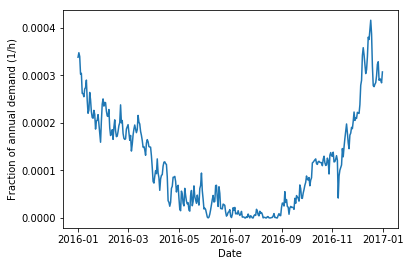

In [11]:
#plot the demand profile
ax = sns.lineplot(x = P_SR['Date'], y = P_SR['Normalized_Total'] * E_T * 1000, legend = 'full', ci = None)
ylabel = plt.ylabel('Fraction of annual demand (1/h)')

### Commercial & Institutional space heat demand profile

In [ ]:
#Commmercial space heat demand profile is derived from 16 types of reference building models published by US DOE.
#Buildings are weighted to match the building stock in British Columbia
#source data available at: https://openei.org/doe-opendata/dataset/commercial-and-residential-hourly-load-profiles-for-all-tmy3-locations-in-the-united-states

#File names are rather long, let's define the prefix and suffix of file names to save space.
pre = 'RefBldg'
suf = 'New2004_v1.3_7.1_4C_USA_WA_SEATTLE.csv'

# #WEIGHTING REMOVED BY RESETTING WEIGHTS TO 1 BELOW
# #Dictionary of buidling types and their resective weights. Weights are approximated by the number of 
# #establishements surveyed in British Columbia from Table 2.1 in 
# #"Natural Resources Canada, 2013. Survey of commercial and institutional energy use: establishments 2009"
# #http://oee.nrcan.gc.ca/publications/statistics/scieu/2009/pdf/SCIEU2009Establishments.pdf
# bldgDict = {'FullServiceRestaurant' : 8254, #Food Services and Drinking Places (722)
#             'Hospital' : 81 + 1152, #81 Hostpitals (622) + 1152 Nursing and Residential Care Facilities (623)
#             'LargeHotel': round(1691/2), # half of 1691 Accommodation Services (721)
#             'LargeOffice' :  672 + 26, # 672 Public Administration (91) + 26 Universities (6113)
#             'MediumOffice' :3072 + 2076, # 3072 Religious Organizations (813110) + 2076 Arts, Entertainment and Recreation (71)
#             'MidriseApartment' : 0,
#             'OutPatient' : 7771 + 1905, # 7771 Ambulatory Health Care Services (621) + 1905 Social Assistance (624) 
#             'PrimarySchool' : round(1909/2), # half of 1909 Primary and Secondary Schools (6111) 
#             'QuickServiceRestaurant' : 0,
#             'SecondarySchool' : round(1909/2) + 1477, # half of 1909 Primary and Secondary Schools (6111)+ 1477 Colleges, CÉGEPs and Other Schools (6112, 6114, 6115, 6116, 6117)
#             'SmallHotel' : round(1691/2), # half of 1691 Accommodation Services (721)
#             'SmallOffice' : 1185 + 23978, #1185 Information and Cultural Industries (51) + 23978 Financial, Real Estate and Other Professional Services (52–56)
#             'Stand-aloneRetail' : 14364,#Retail trade (44 - 45, excluding 445)
#             'StripMall' :0,
#             'SuperMarket' : 2486, #Food and Beverage Industries (445)
#             'Warehouse' : 8141 + 11105} # 8141 Wholesale and Warehousing (41 & 49) + 11105 Transportation and Other Services (48 and 81) (Except 813110) 

# #weight each commercial building type as one, except midrise apartments
# for k in bldgDict:
#     if k != 'MidriseApartment':
#         bldgDict[k] = 1
# #print(bldgDict)
    
#DOE Weights for CLimate Zone 4C
bldgDict = {'FullServiceRestaurant' :24.6,
            'Hospital' :5.8,
            'LargeHotel':13.3,
            'LargeOffice' : 4.1,
            'MediumOffice' :48.3,
            'MidriseApartment' : 0,
            'OutPatient' :58.5,
            'PrimarySchool' :16.8,
            'QuickServiceRestaurant' : 75.7,
            'SecondarySchool' :15.2,
            'SmallHotel' :12,
            'SmallOffice' :294.8,
            'Stand-aloneRetail' :227.1,
            'StripMall' :62.8,
            'SuperMarket' :10.8,
            'Warehouse' :110.7}
    
#the name of the column contains the heat demand in each csv file
heatColumn = 'Heating:Gas [kW](Hourly)'

#Create a data frame with the dates and HE (hour ending) from our P_SR dataframe to store our heat demand.
P_SC = P_SR.loc[:,'Date':'HE']
P_SC = P_SC.reset_index(drop=True)

#lets create a datetime column
P_SC['Datetime'] = pd.to_datetime(P_SC['Date'].astype(str) + ' ' + (P_SC['HE'] -1).astype(str) + ':00')

#Read the csv files and add the heating demand colomn from each csv file to our dataframe
for bldg, weight in bldgDict.items():
    
    #read each entire csv
    dfTemp = pd.read_csv('../data/demand/heat/commercial/'+pre+bldg+suf)
    
    #copy the column with the heat demand into our dataframe
    P_SC.loc[:,bldg] = dfTemp.loc[:, heatColumn] * weight

#Create the sum of all building demands
P_SC.loc[:,'Total'] = P_SC.loc[:, bldgDict.keys()].sum(axis=1)

#Normalize the total Commercial, Institutional and Publich Administration building demands
P_SC['Normalized_Total'] = P_SC['Total'] / P_SC['Total'].sum()

#Plot the commercial & institutional demand profile
ax = sns.lineplot(x = P_SC['Date'], y = P_SC['Normalized_Total'], legend = 'full', ci = None)
ylabel = plt.ylabel('Load (1/h)')

#print(P_SC['Normalized_Total'].max())

### Total space heat demand profile

In [ ]:
#Create the combined space heat demand profile from the residential
#and the commercial & institutional profile
P_SH = P_SR.loc[:,'Date':'HE']

#lets create a datetime column
P_SH['Datetime'] = pd.to_datetime(P_SH['Date'].astype(str) + ' ' + (P_SH['HE'] -1).astype(str) + ':00')

#Create separate heat demand profiles for HIGH and LOW scenarios
P_SH['Demand'] = (P_SR['Normalized_Total'] * E_S_Heat_R) + (P_SC['Normalized_Total'] * E_S_Heat_C)
#P_H['HIGH_Demand'] = (P_R['Normalized_Total'] * E_R_HIGH) + (P_C['Normalized_Total'] * E_C_HIGH)

#Create normalized heat demand profiles (These normalized profiles should be equivalent to each other!)
P_SH['Normalized_Demand'] = P_SH['Demand'] / P_SH['Demand'].sum()
#P_H['Normalized_HIGH_Demand'] = P_H['HIGH_Demand'] / P_H['HIGH_Demand'].sum()

#Plot the combined residential and commercial & institutional demand profile
ax = sns.lineplot(x = P_SH['Date'], y = P_SH['Normalized_Demand'], legend = 'full', ci = None)
#ax2 = sns.lineplot(x = P_H['Date'], y = P_H['Normalized_HIGH_Demand'], legend = 'full', ci = None)
ylabel = plt.ylabel('Load (1/h)')

## Water heat demand profile

### Residential water heat demand profile

In [ ]:
#print(P_SR.head())

#Residential water heating demand is taken from the IESO CE Tool, data was provided by Guidehouse (formerly Navigant)
P_WR = pd.read_excel('../data/demand/heat/residential/Guidehouse Load shapes.xlsx', sheet_name='IESO CE Tool')

#lets create a date and datetime column
P_WR['Date'] = P_SR['Date']
P_WR['Datetime'] = pd.to_datetime(P_SR['Date'].astype(str) + ' ' + (P_SR['HE'] -1).astype(str) + ':00')

#copy the column with our data to the "Normalized_Total" column (we do this to match naming format in other profile dataframes)
#the column in the IESO data is already normalized
P_WR['Normalized_Total'] = P_WR['Domestic_Hot_Water']
                
#plot the demand profile
ax = sns.lineplot(x = P_WR['Date'], y = P_WR['Normalized_Total'], legend = 'full', ci = None)
ylabel = plt.ylabel('Load (1/h)')

### Commercial water heat demand profile

In [ ]:
#Commmercial water heat demand profile is derived from 16 types of reference building models published by US DOE.
#Commercial Buildings are weighted to match the building stock in British Columbia
#source data available at: https://openei.org/doe-opendata/dataset/commercial-and-residential-hourly-load-profiles-for-all-tmy3-locations-in-the-united-states

#File names are rather long, let's define the prefix and suffix of file names to save space.
pre = 'RefBldg'
suf = 'New2004_v1.3_7.1_4C_USA_WA_SEATTLE.csv'

# #WEIGHTING REMOVED BY RESETTING WEIGHTS TO 1 BELOW
# #Dictionary of buidling types and their resective weights. Weights are approximated by the number of 
# #establishements surveyed in British Columbia from Table 2.1 in 
# #"Natural Resources Canada, 2013. Survey of commercial and institutional energy use: establishments 2009"
# #http://oee.nrcan.gc.ca/publications/statistics/scieu/2009/pdf/SCIEU2009Establishments.pdf
# bldgDict = {'FullServiceRestaurant' : 8254, #Food Services and Drinking Places (722)
#             'Hospital' : 81 + 1152, #81 Hostpitals (622) + 1152 Nursing and Residential Care Facilities (623)
#             'LargeHotel': round(1691/2), # half of 1691 Accommodation Services (721)
#             'LargeOffice' :  672 + 26, # 672 Public Administration (91) + 26 Universities (6113)
#             'MediumOffice' :3072 + 2076, # 3072 Religious Organizations (813110) + 2076 Arts, Entertainment and Recreation (71)
#             'MidriseApartment' : 0,
#             'OutPatient' : 7771 + 1905, # 7771 Ambulatory Health Care Services (621) + 1905 Social Assistance (624) 
#             'PrimarySchool' : round(1909/2), # half of 1909 Primary and Secondary Schools (6111) 
#             'QuickServiceRestaurant' : 0,
#             'SecondarySchool' : round(1909/2) + 1477, # half of 1909 Primary and Secondary Schools (6111)+ 1477 Colleges, CÉGEPs and Other Schools (6112, 6114, 6115, 6116, 6117)
#             'SmallHotel' : round(1691/2), # half of 1691 Accommodation Services (721)
#             'SmallOffice' : 1185 + 23978, #1185 Information and Cultural Industries (51) + 23978 Financial, Real Estate and Other Professional Services (52–56)
#             'Stand-aloneRetail' : 14364,#Retail trade (44 - 45, excluding 445)
#             'StripMall' :0,
#             'SuperMarket' : 2486, #Food and Beverage Industries (445)
#             'Warehouse' : 8141 + 11105} # 8141 Wholesale and Warehousing (41 & 49) + 11105 Transportation and Other Services (48 and 81) (Except 813110) 

# #weight each commercial building type as one, except midrise apartments
# for k in bldgDict:
#     if k != 'MidriseApartment':
#         bldgDict[k] = 1
# #print(bldgDict)

#DOE Weights for CLimate Zone 4C
bldgDict = {'FullServiceRestaurant' :24.6,
            'Hospital' :5.8,
            'LargeHotel':13.3,
            'LargeOffice' : 4.1,
            'MediumOffice' :48.3,
            'MidriseApartment' : 0,
            'OutPatient' :58.5,
            'PrimarySchool' :16.8,
            'QuickServiceRestaurant' : 75.7,
            'SecondarySchool' :15.2,
            'SmallHotel' :12,
            'SmallOffice' :294.8,
            'Stand-aloneRetail' :227.1,
            'StripMall' :62.8,
            'SuperMarket' :10.8,
            'Warehouse' :110.7}

#the name of the column contains the water heat demand in each csv file
heatColumn = 'Water Heater:WaterSystems:Gas [kW](Hourly)'

#Create a data frame with the dates and HE (hour ending) from our P_R dataframe to store our heat demand.
P_WC = P_SR.loc[:,'Date':'HE']
P_WC = P_SC.reset_index(drop=True)

#lets create a datetime column
P_WC['Datetime'] = pd.to_datetime(P_WC['Date'].astype(str) + ' ' + (P_WC['HE'] -1).astype(str) + ':00')

#Read the csv files and add the heating demand colomn from each csv file to our dataframe
for bldg, weight in bldgDict.items():
    
    #read each entire csv
    dfTemp = pd.read_csv('../data/demand/heat/commercial/'+pre+bldg+suf)
      
    #copy the column with the heat demand into our dataframe
    P_WC.loc[:,bldg] = dfTemp.loc[:, heatColumn] * weight

#Create the sum of all building demands
P_WC.loc[:,'Total'] = P_WC.loc[:, bldgDict.keys()].sum(axis=1)

#Normalize the total Commercial, Institutional and Publich Administration building demands
P_WC['Normalized_Total'] = P_WC['Total'] / P_WC['Total'].sum()

#Plot the commercial & institutional demand profile
ax = sns.lineplot(x = P_WC['Date'], y = P_WC['Normalized_Total'], legend = 'full', ci = None)
ylabel = plt.ylabel('Load (1/h)')

### Total water heat demand profile

In [ ]:
#Create the combined water heat demand profile from the residential
#and the commercial & institutional profile
P_WH = P_SR.loc[:,'Date':'HE']

#lets create a datetime column
P_WH['Datetime'] = pd.to_datetime(P_SH['Date'].astype(str) + ' ' + (P_SH['HE'] -1).astype(str) + ':00')

#Create water heat demand column [GW]
P_WH['Demand'] = (P_WR['Normalized_Total'] * E_W_Heat_R) + (P_WC['Normalized_Total'] * E_W_Heat_C)

#Create a normalized water heat demand profile [Fraction]
P_WH['Normalized_Demand'] = P_WH['Demand'] / P_WH['Demand'].sum()

#Plot the combined residential and commercial & institutional water heat demand profile
ax = sns.lineplot(x = P_WH['Date'], y = P_WH['Normalized_Demand'], legend = 'full', ci = None)
#ax2 = sns.lineplot(x = P_H['Date'], y = P_H['Normalized_HIGH_Demand'], legend = 'full', ci = None)
ylabel = plt.ylabel('Load (1/h)')

## Transportation Demand Profile

In [ ]:
#Create a data frame with the dates and HE (hour ending) from our P_SR dataframe to store our transportation demand.
P_T = P_SR.loc[:,'Date':'HE']
P_T = P_SC.reset_index(drop=True)

#lets create a datetime column
P_T['Datetime'] = pd.to_datetime(P_T['Date'].astype(str) + ' ' + (P_T['HE'] -1).astype(str) + ':00')

#Using evening-peaking electrified transportation demand profile from Keller et al. 2019
#read the 24h demand profile
dfTemp=pd.read_csv('../data/demand/transportation/2019_06_21_Vehicle demand profile BC_24h.csv')

#repeat the 24h profile for all 365 days and normalize
dfTemp2 = pd.concat([dfTemp]*365, ignore_index=True)
dfTemp2['Normalized_Demand'] = dfTemp2 ['Demand'] / dfTemp2 ['Demand'].sum() 

#copy the normalized peak demand profile into our profile dataframe
P_T['PEAK']= dfTemp2['Normalized_Demand']

#Plot the transportation demand profiles
ax = sns.lineplot(x = P_T['HE'][0:23], y = P_T['PEAK'][0:23], legend = 'full', ci = None)
#ax2 = sns.lineplot(x = P_T['HE'][0:23], y = P_T['UNIFORM'][0:23], legend = 'full', ci = None)
ylabel = plt.ylabel('Load (1/h)')

## Remaining Electricity Demand Profile
based on BC's historic hourly puplished by the BC Balancing Authority 

In [ ]:
#Present day electricity demand in British Columbia [MW]
P_E = pd.read_excel('../data/demand/electricity/BalancingAuthorityLoad2016_wout_29Feb_summertime.xls', sheet_name='wout_Feb29_wout_DaylightST', skiprows=1)
P_E = P_E.rename(index=str, columns={'Balancing Authority Load': 'BA_Demand'})
P_E.columns.values[0] = 'Date'

#lets create a datetime column
P_E['Datetime'] = pd.to_datetime(P_E['Date'].astype(str) + ' ' + (P_E['HE'] -1).astype(str) + ':00')

#Normalize the load profile by deviding the hourly load by the annual demand
P_E.loc[:,'Normalized_Gross_Demand'] = P_E.loc[:,'BA_Demand'] / P_E['BA_Demand'].sum()

#The BA Demand is the demand of all of BC, but lack of documentation renders it unclear which
#components (e.g. Fortis BC, imports/exports, Catalyst paper, etc.) are included. Therefore, we
#only use the profile and multiply that profile with our gross Vancouver electricity demand.
P_E.loc[:,'Gross_Demand'] = P_E.loc[:,'Normalized_Gross_Demand'] * get('E_G')

#let's reset the index because arithmetic with various dataframes was giving us problems
P_E = P_E.reset_index(drop=True)

#Subtract the historically electric space and water heat demand
P_E.loc[:,'Net_Demand'] = P_E.loc[:,'Gross_Demand'] - ( #Electricity
    P_SR.loc[:,'Normalized_Total']*E_S_Heat_R_e + #Residential Space Heat
    P_SC.loc[:,'Normalized_Total']*E_S_Heat_C_e + #Commercial Space Heat
    P_WR.loc[:,'Normalized_Total']*E_W_Heat_R_e + #Residential Water Heat
    P_WC.loc[:,'Normalized_Total']*E_W_Heat_C_e  #Commercial Water Heat
    )

#Compute the normalized net demand
P_E.loc[:,'Normalized_Net_Demand'] = P_E.loc[:,'Net_Demand'] / P_E.loc[:,'Net_Demand'].sum()  

#plot the gross and net remaining electricity demand profiles
ax = sns.lineplot(x = P_E['Date'], y = P_E['Normalized_Gross_Demand'], legend = 'full', ci = None)
ax2 = sns.lineplot(x = P_E['Date'], y = P_E['Normalized_Net_Demand'], legend = 'full', ci = None)
ylabel = plt.ylabel('Load (1/h)')

## Total Electricity Demand Profile
The total demand profiles for remaining electricity, space and water heat, and transportation

In [ ]:
#Create the Dataframe appropriate date and HE (hour ending) columns
P_D = pd.DataFrame()
P_D['Date'], P_D['HE'] = P_E['Date'], P_E['HE']

#lets create a datetime column
P_D['Datetime'] = pd.to_datetime(P_D['Date'].astype(str) + ' ' + (P_D['HE'] -1).astype(str) + ':00')

#Let's put the heat and electricity demands into a single dataframe
P_D['Normalized_Space_Heat_Demand'] = P_SH['Normalized_Demand']
P_D['Normalized_Water_Heat_Demand'] = P_WH['Normalized_Demand']
P_D['Normalized_Elec_Demand'] = P_E['Normalized_Net_Demand']

#Compute net demand for increasing shares of transportation electrification (0 to 100% electrification)
#colDemandPrefix = 'Net_Demand'
for elecShare in range(0,101,10): #go from 0 to 100 in intervalls of 10
    colDemandName = 'Normalized_Elec_Demand_' + str(elecShare) +'ShareElecTransp'
    P_D[colDemandName] = (
        (P_E.loc[:,'Net_Demand'] + P_T['PEAK'] * E_T * elecShare/100) #net demand + transport electrification demand * electrification share 
        /(P_E.loc[:,'Net_Demand'].sum() + E_T * elecShare/100) #divide by energy to normalize profile
    )

# 5. Create scenario-specific OSeMOSYS model input parameter files

In [ ]:
#function to write a file in the OSeMOSYS parameter format
def demandAndProfile(demandNames, annualDemands, demandProfiles, file):
    with open(file, 'w') as f:
        #Annual demand
        f.write('# Demand\n')
        f.write('# SpecifiedAnnualDemand{r in REGION, f in FUEL, y in YEAR}  Units: GWh\n')
        f.write('# The annual requirement for each output fuel.\n')
        f.write('param SpecifiedAnnualDemand default 0 :=\n')
        f.write('[Vancouver,*,*]: 2015 :=\n')
        for d, demandName in enumerate(demandNames):
            f.write(demandName + '\t' + str(annualDemands[d]*1000) + '\n')
        f.write(';\n\n')
        
        #demand profile
        f.write('#param SpecifiedDemandProfile{r in REGION, f in FUEL, l in TIMESLICE, y in YEAR} Units: fraction of SpecifiedAnnualDemand per hour\n')
        f.write('# Normalized load profile, as in the hourly load as a fraction of the total annual demand\n')
        f.write('param SpecifiedDemandProfile default 0 :=\n')
        f.write('[Vancouver,*,*,2015]: ')
        [f.write(str(hour)+'\t') for hour in range(1,len(demandProfiles[d])+1)]
        f.write('\n:=\n')
        for d, demandName in enumerate(demandNames):
            #f.write(demandName + '\t' + str([str(item)+'\t' for idx, item in demandProfiles[d].iteritems()] + '\n'))
            f.write(demandName + '\t' + ''.join([str(item)+'\t' for idx, item in demandProfiles[d].iteritems()]) + '\n')
        f.write('\n;')
        

In [ ]:
#Fetch the perturbed space heat demand if we are to include it in the OSeMOSYS parameter file
if perturbSpaceHeat == True:
    tempSHdemand = pd.read_csv('../pre-processing/total_hourly_demands/perturbed_hourly_space_heat_demand.csv')
    P_SH['Perturbed_SH_Demand_Total_TW'] = tempSHdemand['SH_Demand_Total_GW'] / 1000 #convert GW to TW
    P_SH['Perturbed_SH_Normalized_Demand_Total'] = P_SH['Perturbed_SH_Demand_Total_TW'] / P_SH['Perturbed_SH_Demand_Total_TW'].sum()

In [ ]:
#Create OSeMOSYS parameter files for net demand plus increasing shares
#of transportation electrification (0 to 100% electrification)

demandNames= ['dELEC', 'dS_HEAT','dW_HEAT']

for elecShare in range(0,101,10): #go from 0 to 100 in intervalls of 10
    
    #define the filename where the individual paramter files will be saved
    filename = 'remaining_elec_demand_plus_'+ str(elecShare) +'ShareElecTransp.txt'
    
    #Create list of annual demands
    annualDemands = [
        P_E['Net_Demand'].sum() + E_T * elecShare/100, #Electricity
        #P_SH['Perturbed_SH_Demand_Total_TW'].sum() if perturbSpaceHeat == True else P_SH['SH_Demand_Total_TW'].sum(), #Space Heat
        P_SH['Perturbed_SH_Demand_Total_TW'].sum() if perturbSpaceHeat == True else P_SH['Demand'].sum(), #Space Heat
        P_WH['Demand'].sum() #Water Heat        
    ]
    
    #define which column to use for the electricity demand profile based on the transport electrification percentage
    colDemandName = 'Normalized_Elec_Demand_' + str(elecShare) +'ShareElecTransp'
    
    #Create list of demand profiles
    demandProfiles = [
        P_D[colDemandName], #electricity
        #P_SH['Perturbed_SH_Normalized_Demand_Total'] if perturbSpaceHeat == True else P_SH['SH_Normalized_Demand_Total_TW'], #Space Heat
        P_SH['Perturbed_SH_Normalized_Demand_Total'] if perturbSpaceHeat == True else P_SH['Normalized_Demand'], #Space Heat
        P_WH['Normalized_Demand']
    ]
    
    #Write the parameter file
    demandAndProfile(demandNames=demandNames,
                     annualDemands=annualDemands,
                     demandProfiles=demandProfiles, 
                     file=path.join('OSeMOSYS_params',version,filename))


# #Name of scenarios
# scenarios = ['LOW-PEAK', 'HIGH-PEAK', 'LOW-UNIFORM', 'HIGH-UNIFORM']

# #save to file called:
# filesuffix = '_demand_and_profile.txt'

# #write to file using our previously defined function
# for scn in scenarios:
#     #this is hacky, but gets around the fact that we have low and high annual demand stored in separate variables.
#     if 'LOW' in scn:
#         demandAndProfile(E_D_LOW, P_D['Normalized_'+scn+'_Demand'], path.join(para_prefix,scn + filesuffix))
#     if 'HIGH' in scn:
#         demandAndProfile(E_D_HIGH, P_D['Normalized_'+scn+'_Demand'], path.join(para_prefix,scn + filesuffix))

# 6. Create csv file with electricity and heat demand profiles

unit of columns "\*\_Demand": TW

unit of columns "Normalized_\*\_Demand": 1/h (fraction of total annual demand)

\* = {ELEC, HEAT}


In [ ]:
#Name of scenarios
#scenarios = ['LOW-PEAK', 'HIGH-PEAK', 'LOW-UNIFORM', 'HIGH-UNIFORM']

#save to file called:
hourly_demand_file = 'hourly_demands.csv'

#convert the demands from TW to GW
#for s in scenarios:
#    P_D[s+'_Demand'] = P_D[s+'_Demand'] * 1000

#save the total hourly demands and the hourly demand profiles to a csv
P_D.to_csv(path.join(demand_prefix,hourly_demand_file), index_label='Hour_number')

In [ ]:
#save the space heat demand separately so we can purturb the demand using historic temperature records
#space_heat_demand_file = 'hourly_space_heat_demand.csv'
#P_SH.to_csv(path.join(demand_prefix,space_heat_demand_file), columns=['Demand'], index_label='Hour_number')


In [ ]:
# #Create a single dataframe for all space heat demands so we can purturb the demand using historic temperature records
# P_SH_all = P_SH

# #Add the individual residential and commercial space heat demand columns
# P_SH_all['Demand_R'] = (P_SR['Normalized_Total'] * E_S_Heat_R)
# P_SH_all['Demand_C'] = (P_SC['Normalized_Total'] * E_S_Heat_C)

# #print(P_SH_all.head())

# space_heat_demand_file = 'hourly_space_heat_demand.csv'
# P_SH_all.to_csv(path.join(demand_prefix,space_heat_demand_file), columns=['Demand', 'Demand_R', 'Demand_C'], index_label='Hour_number')

In [ ]:
#Output both RESIDENTIAL and COMMERCIAL demand for porturbation
#Create a single dataframe for all space heat demands so we can purturb the demand using historic temperature records
P_SH_all = P_SH

#Add the individual residential and commercial space heat demand columns
P_SH_all['SH_Demand_R_TW'] = (P_SR['Normalized_Total'] * E_S_Heat_R)
P_SH_all['SH_Demand_C_TW'] = (P_SC['Normalized_Total'] * E_S_Heat_C)

#rename the total residential and commercial demand for clarity
P_SH_all.rename(columns={'Demand':'SH_Demand_Total_TW', 'Normalized_Demand':'SH_Normalized_Demand_Total_TW'}, inplace=True)

#print(P_SH_all.head())

#Output residential and commercial total demand profiles to csv file
cols=['SH_Demand_R_TW','SH_Demand_C_TW','SH_Demand_Total_TW']
space_heat_demand_file = 'hourly_space_heat_demand.csv'
P_SH_all.to_csv(path.join(demand_prefix,space_heat_demand_file), columns=cols, index_label='Hour_number')



print(P_SH_all.head())

In [ ]:
#Output residential and commercial total demand profiles to csv file for CODERS database

#Convert TW to GW
P_SH_all['SH_Demand_R_GW'] = P_SH_all['SH_Demand_R_TW'] * 1000
P_SH_all['SH_Demand_C_GW'] = P_SH_all['SH_Demand_C_TW'] * 1000
P_SH_all['SH_Demand_Total_GW'] = P_SH_all['SH_Demand_Total_TW'] * 1000

cols=['Date','HE','Datetime','SH_Demand_R_GW','SH_Demand_C_GW','SH_Demand_Total_GW']
space_heat_demand_file_CODERS = 'hourly_space_heat_demand_for_CODERS.csv'
P_SH_all.to_csv(path.join(demand_prefix,space_heat_demand_file_CODERS), columns=cols, index_label='Hour_number')

In [ ]:
# #Output only COMMERCIAL demand for porturbation
# #Create a single dataframe for all space heat demands so we can purturb the demand using historic temperature records
# P_SH_all = P_SH

# #Add the individual residential and commercial space heat demand columns
# #P_SH_all['Demand'] = (P_SR['Normalized_Total'] * E_S_Heat_R)
# P_SH_all['Demand'] = (P_SC['Normalized_Total'] * E_S_Heat_C)

# #print(P_SH_all.head())

# space_heat_demand_file = 'hourly_space_heat_demand.csv'
# P_SH_all.to_csv(path.join(demand_prefix,space_heat_demand_file), columns=['Demand'], index_label='Hour_number')

# print(P_SH_all.head())

In [ ]:
# #Prior to electrification, Metro Vancouver's peak demand was:
# priorElecPeak = P_E['Gross_Demand'].max()*1000
# print('Prior to electrification, Metro Vancouver\'s peak demand was: ' + str(round(priorElecPeak,4)) + ' GW')

In [ ]:
# #After electrification, Metro Vancouver's peak heat demand is:
# postElecPeakHeatLOW = P_H['LOW_Demand'].max()*1000
# postElecPeakHeatHIGH = P_H['HIGH_Demand'].max()*1000

# print('After electrification, Metro Vancouver\'s peak heat demand is (LOW-efficiency heating): ' + str(round(postElecPeakHeatLOW,4)) + ' GW')
# print('After electrification, Metro Vancouver\'s peak heat demand is (HIGH-efficiency heating): ' + str(round(postElecPeakHeatHIGH,4)) + ' GW')

In [ ]:
#Output peak demands
#Residential space heat demand
Peak_S_HEAT_R = max(P_SR['Normalized_Total'] * E_S_Heat_R *1000)
print(f'Peak residential space heat demand is: {Peak_S_HEAT_R:.2f} GW')
#Commercial space heat demand
Peak_S_HEAT_C = max(P_SC['Normalized_Total'] * E_S_Heat_C *1000)
print(f'Peak commercial space heat demand is: {Peak_S_HEAT_C:.2f} GW')

In [ ]:
#Output commercial building-specific demand profiles to csv file
cols=bldgDict.keys()
building_space_heat_demand_file = 'commercial_building-specific_hourly_space_heat_demand.csv'
P_SC.to_csv(path.join(demand_prefix,building_space_heat_demand_file), columns=cols, index_label='Hour_number')

In [ ]:
P_SC.loc[:,bldgDict.keys()].sum()

In [ ]:
P_SH